# Project Title with Algorithm Used

# 1.Goal

# 1.1 Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# 2.Data

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("autonomous_vehicle_dataset.csv")
dataset.head()

Timestamp  Distance to Obstacles (m)  Speed (m/s)  \
0  2023-01-01 00:00:00                  46.721264    19.034705   
1  2023-01-01 00:00:01                   5.527450    25.432505   
2  2023-01-01 00:00:02                  14.543466    20.168641   
3  2023-01-01 00:00:03                  33.096642    29.266227   
4  2023-01-01 00:00:04                  11.592862    16.880867   

   Heading Angle (degrees)  Lane Position (m)  Acceleration (m/s^2)  \
0               199.295473          -1.993495             -3.350324   
1               199.692348          -1.924481             -0.635540   
2               113.615340          -1.789834              0.590695   
3               220.584766           0.655706             -3.448555   
4               277.516187           0.432324             -0.845631   

   Turn Rate (degrees/s)  Sensor Data 1  Sensor Data 2  Sensor Data 3  \
0              -1.972343       0.403405       0.804553       0.762933   
1              -3.560040       0.570538       0.477551       0.477412   
2             -12.516187       0.857895       0.755116       0.842961   
3              -7.718976       0.276697       0.493059       0.426371   
4             -21.213612       0.443726       0.936245       0.446850   

   Sensor Data 4             Action  Safety Environment Type  \
0       0.904577         Accelerate       0       Urban Area   
1       0.585180  Change Lane Right       0          Highway   
2       0.500830         Accelerate       1          Highway   
3       0.475993   Change Lane Left       0       Rural Road   
4       0.290595   Change Lane Left       1       Urban Area   

  Weather Conditions Road Conditions  
0              Rainy             Icy  
1              Rainy             Icy  
2              Clear             Dry  
3              Clear             Icy  
4              Foggy             Wet

# 2.1 Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Read the dataset
dataset = pd.read_csv("autonomous_vehicle_dataset.csv")

# Handling missing values (if any)
imputer = SimpleImputer(strategy="mean")
numerical_cols = ['Distance to Obstacles (m)', 'Speed (m/s)', 'Acceleration (m/s^2)', 'Heading Angle (degrees)', 'Lane Position (m)', 'Turn Rate (degrees/s)']
dataset[numerical_cols] = imputer.fit_transform(dataset[numerical_cols])

# Encoding categorical variables
categorical_cols = ['Environment Type', 'Weather Conditions', 'Road Conditions']
encoder = OneHotEncoder(drop="first")  # Drop first category to avoid multicollinearity
encoded_features = encoder.fit_transform(dataset[categorical_cols])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
dataset = pd.concat([dataset, encoded_df], axis=1)
dataset.drop(categorical_cols, axis=1, inplace=True)

# Feature Scaling
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Splitting data into features and target
X = dataset.drop(['Action', 'Safety', 'Timestamp'], axis=1)  # Features
y = dataset['Safety']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, y_test for training your machine learning model.


# A.Check For Duplicates

In [4]:
import pandas as pd

# Read the dataset
dataset = pd.read_csv("autonomous_vehicle_dataset.csv")

# Check for duplicates
duplicates = dataset.duplicated()

# Print the number of duplicates
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicate rows
duplicate_rows = dataset[duplicates]
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Timestamp, Distance to Obstacles (m), Speed (m/s), Heading Angle (degrees), Lane Position (m), Acceleration (m/s^2), Turn Rate (degrees/s), Sensor Data 1, Sensor Data 2, Sensor Data 3, Sensor Data 4, Action, Safety, Environment Type, Weather Conditions, Road Conditions]
Index: []


# B.Check for Null Values

In [5]:
import pandas as pd

# Read the dataset
dataset = pd.read_csv("autonomous_vehicle_dataset.csv")

# Check for null values
null_values = dataset.isnull().sum()

# Print the columns with null values and their respective counts
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
Series([], dtype: int64)


# 3.EDA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
dataset = pd.read_csv("autonomous_vehicle_dataset.csv")

# 1. Summary Statistics
print("Summary Statistics:")
print(dataset.describe())



Summary Statistics:
       Distance to Obstacles (m)  Speed (m/s)  Heading Angle (degrees)  \
count                1000.000000  1000.000000              1000.000000   
mean                   25.171084    15.095319               181.776898   
std                    14.231868     8.692611               103.398981   
min                     0.057983     0.030134                 0.040567   
25%                    12.864992     7.430116                92.009948   
50%                    25.135478    15.026985               184.774126   
75%                    37.873096    22.858534               270.031701   
max                    49.841170    29.973727               359.641955   

       Lane Position (m)  Acceleration (m/s^2)  Turn Rate (degrees/s)  \
count        1000.000000           1000.000000            1000.000000   
mean           -0.012980             -0.107554               0.652597   
std             1.141465              2.848399              17.714301   
min            -1.996

# 3.1 Analysis of Features

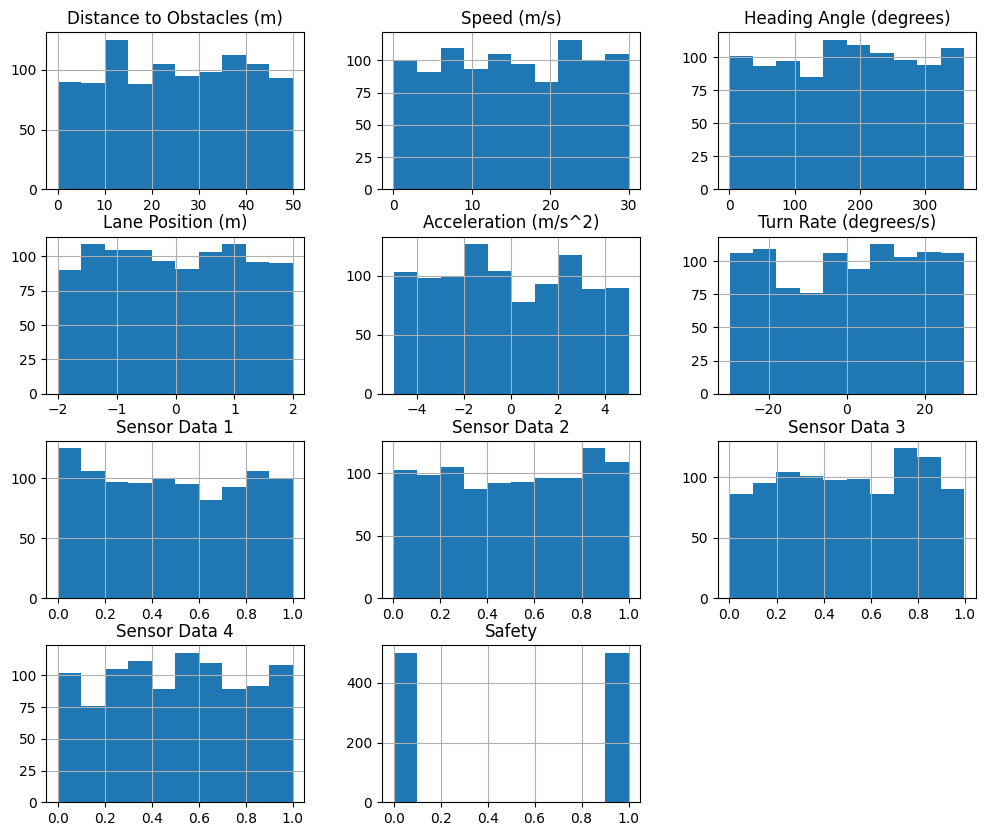

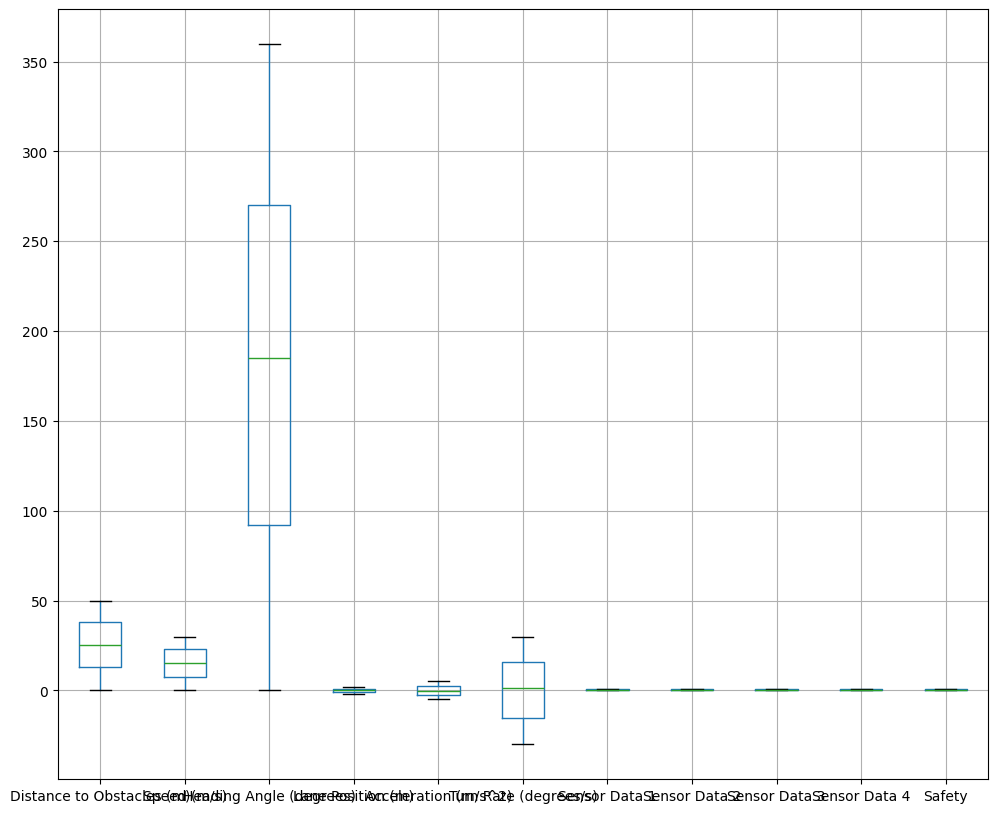

C:\Users\Aparn\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aparn\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Aparn\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aparn\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

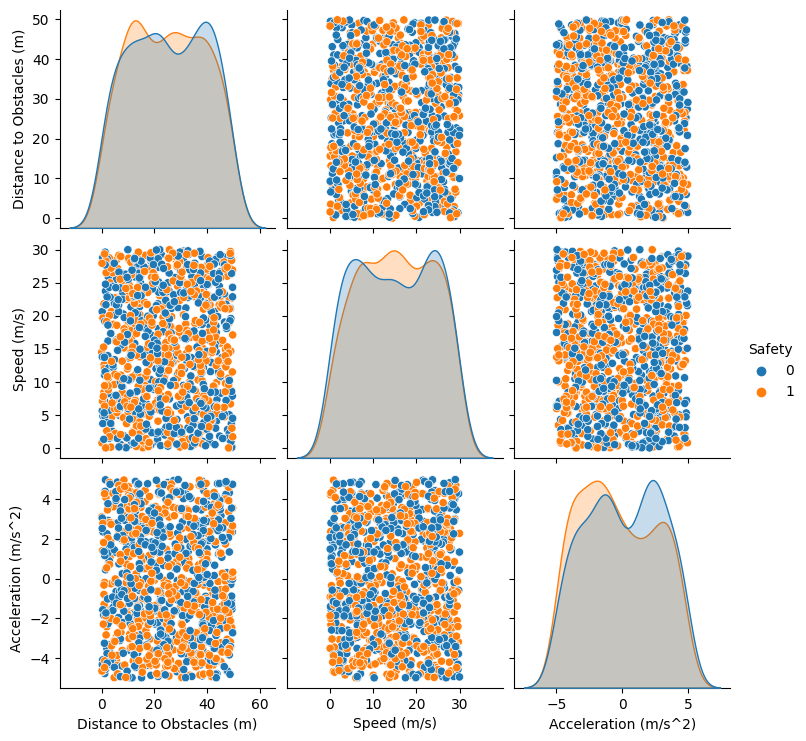

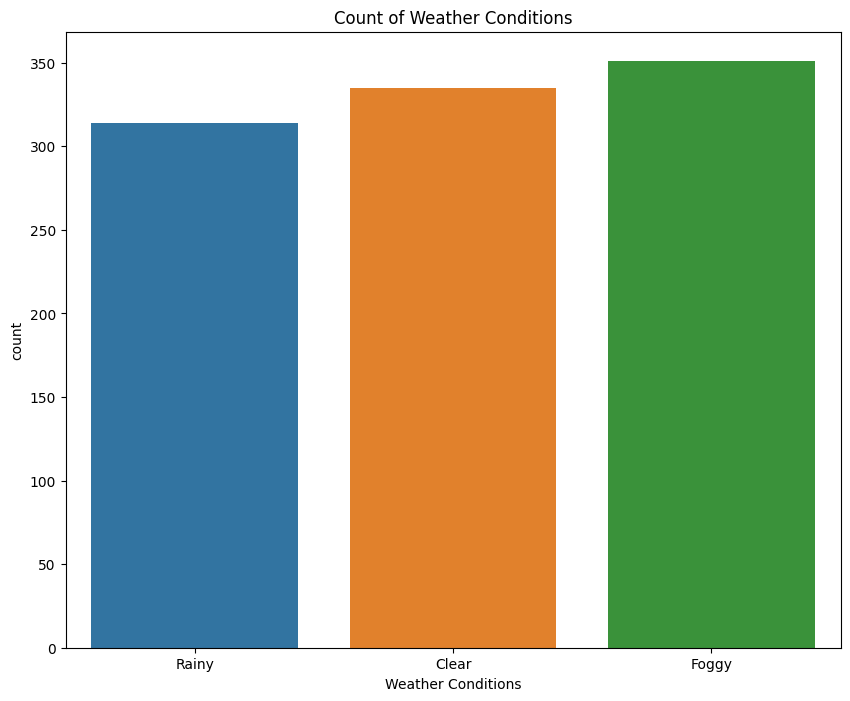

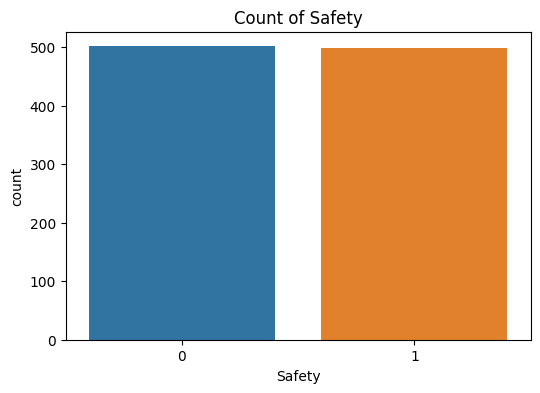

In [7]:
#  Data Visualization
# Histograms of numerical features
dataset.hist(figsize=(12, 10))
plt.show()

# Box plots of numerical features
dataset.boxplot(figsize=(12, 10))
plt.show()

# Scatter plots of numerical features against the target variable
sns.pairplot(dataset, vars=['Distance to Obstacles (m)', 'Speed (m/s)', 'Acceleration (m/s^2)'], hue='Safety', diag_kind='kde')
plt.show()

# Categorical Variables Analysis
# Count plots of categorical variables
plt.figure(figsize=(10, 8))
sns.countplot(x='Weather Conditions', data=dataset)
plt.title('Count of Weather Conditions')
plt.show()

# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Safety', data=dataset)
plt.title('Count of Safety')
plt.show()

# 3.2 Correlation Matrix

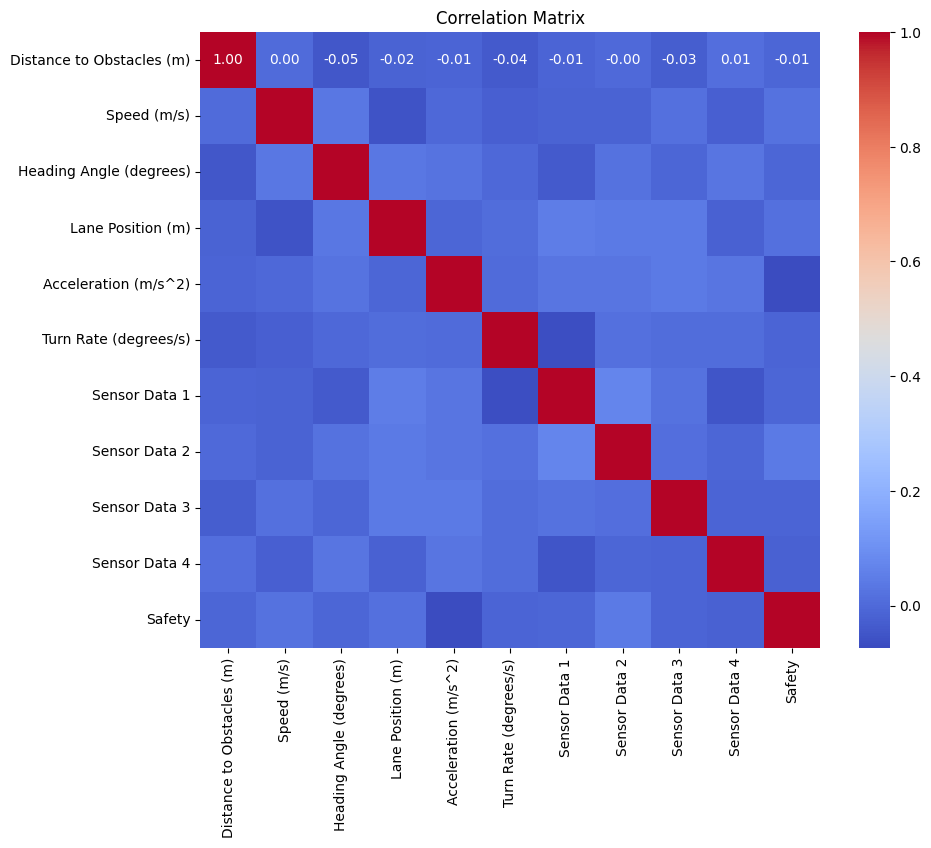

In [8]:
# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

# Correlation Analysis
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 4.Model Comparison

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('autonomous_vehicle_dataset.csv')

# Define features and target variable
X = df[['Distance to Obstacles (m)', 'Speed (m/s)', 'Heading Angle (degrees)', 'Lane Position (m)',
        'Acceleration (m/s^2)', 'Turn Rate (degrees/s)', 'Sensor Data 1', 'Sensor Data 2',
        'Sensor Data 3', 'Sensor Data 4']]
y = df['Action']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    results.append((name, accuracy, precision, recall, f1, auc))

# Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
print(results_df)


C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision  Recall  F1 Score       AUC
0  Logistic Regression     0.185   0.181637   0.185  0.177822  0.474575
1        Decision Tree     0.200   0.200398   0.200  0.198326  0.500532
2        Random Forest     0.210   0.224397   0.210  0.210195  0.551734


# 4.1 Confusion Matrix Comparison

C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


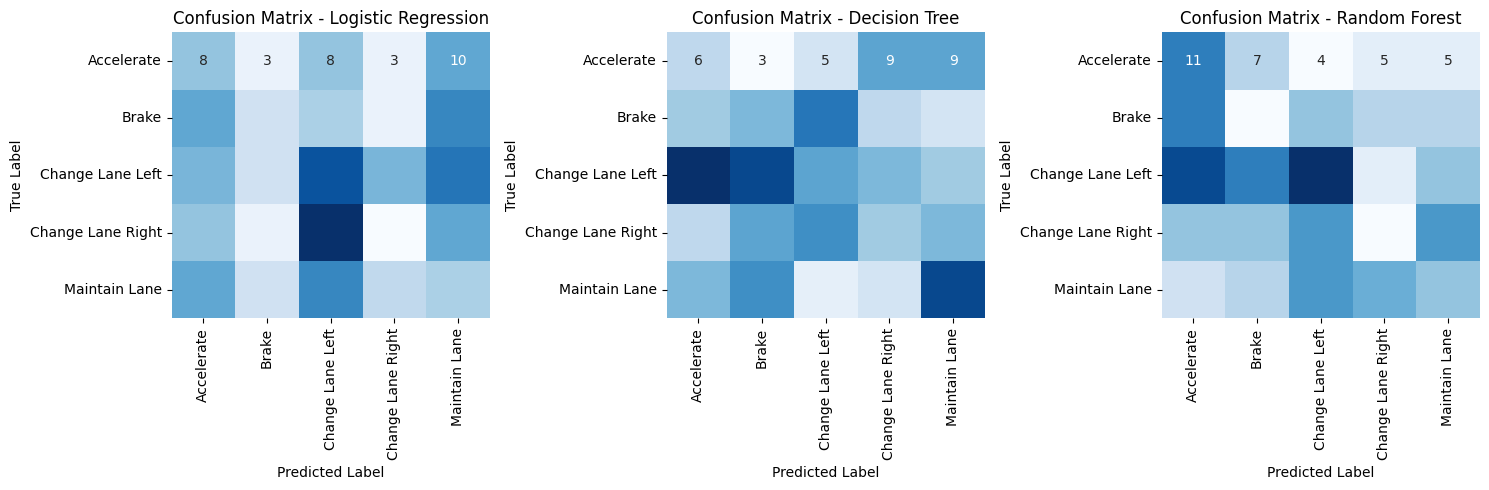

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('autonomous_vehicle_dataset.csv')

# Define features and target variable
X = df[['Distance to Obstacles (m)', 'Speed (m/s)', 'Heading Angle (degrees)', 'Lane Position (m)',
        'Acceleration (m/s^2)', 'Turn Rate (degrees/s)', 'Sensor Data 1', 'Sensor Data 2',
        'Sensor Data 3', 'Sensor Data 4']]
y = df['Action']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Compute confusion matrices
confusion_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Plot confusion matrices
plt.figure(figsize=(15, 5))
for i, (name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(1, len(confusion_matrices), i + 1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


# 4.2ROC and AUC Comparison

C:\Users\Aparn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


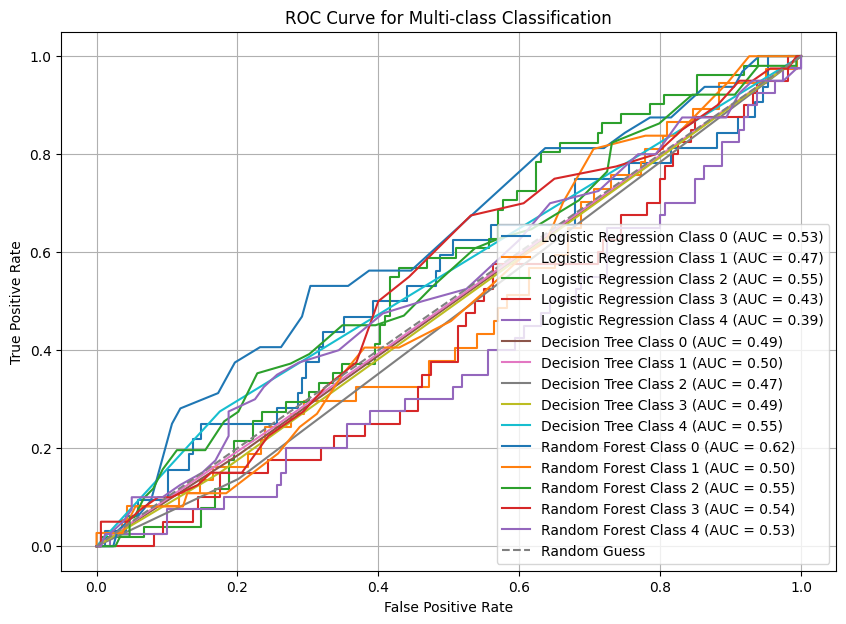

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('autonomous_vehicle_dataset.csv')

# Define features and target variable
X = df[['Distance to Obstacles (m)', 'Speed (m/s)', 'Heading Angle (degrees)', 'Lane Position (m)',
        'Acceleration (m/s^2)', 'Turn Rate (degrees/s)', 'Sensor Data 1', 'Sensor Data 2',
        'Sensor Data 3', 'Sensor Data 4']]
y = df['Action']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Plot ROC curves for each class
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(label_encoder.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{name} Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.grid(True)
plt.show()


# 5.Final Model For Deployment

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('autonomous_vehicle_dataset.csv')

# Define features and target variable
X = df[['Distance to Obstacles (m)', 'Speed (m/s)', 'Heading Angle (degrees)', 'Lane Position (m)',
        'Acceleration (m/s^2)', 'Turn Rate (degrees/s)', 'Sensor Data 1', 'Sensor Data 2',
        'Sensor Data 3', 'Sensor Data 4']]
y = df['Action']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Prompt user for input
print("Please enter the following values to predict the action:")
user_input = np.array([[float(input("Distance to Obstacles (m): ")),
                        float(input("Speed (m/s): ")),
                        float(input("Heading Angle (degrees): ")),
                        float(input("Lane Position (m): ")),
                        float(input("Acceleration (m/s^2): ")),
                        float(input("Turn Rate (degrees/s): ")),
                        float(input("Sensor Data 1: ")),
                        float(input("Sensor Data 2: ")),
                        float(input("Sensor Data 3: ")),
                        float(input("Sensor Data 4: "))]])

# Make prediction for user input
predictions = model.predict(user_input)
predicted_action = label_encoder.inverse_transform([np.argmax(predictions)])

# Output prediction
print("Predicted Action:", predicted_action[0])


Epoch 1/10


C:\Users\Aparn\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2064 - loss: 14.5528
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2207 - loss: 2.7060
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2184 - loss: 1.9807
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2525 - loss: 1.7860
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2199 - loss: 1.7546
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2092 - loss: 1.7652
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2754 - loss: 1.6604
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2536 - loss: 1.7170
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2451 - loss: 1.7603
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2705 - loss: 1.7458
Test Accuracy: 0.23000000417232513
Please enter the following values to predict the action:
Distance to Obstacles (m): 10
Speed (m/s): 20
Heading Angle (degrees): 45
Lan